## Distributions in Pandas

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [2]:
np.random.binomial(1, 0.5) # number of trials, probability of each trial

0

In [4]:
np.random.binomial(1, 0.5, 10)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [5]:
np.random.binomial(1000, 0.5)/1000

0.522

In [8]:
chance_of_tornado = 0.01/100
np.random.binomial(1000000, chance_of_tornado)

94

In [10]:
chance_of_tornado = 0.01

torado_events = np.random.binomial(1, chance_of_tornado, 1000000)

two_days_in_a_row = 0
for j in range(1, len(torado_events)-1):
    if torado_events[j] == 1 and torado_events[j+1] == 1:
        two_days_in_a_row += 1
        
print(two_days_in_a_row)

97


In [11]:
np.random.uniform(0, 1)

0.2629822791486589

In [12]:
np.random.normal(0.75)

0.9666566165425162

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [13]:
distribution = np.random.normal(0.75, size = 1000)

np.sqrt(np.sum((np.mean(distribution) - distribution) ** 2)/len(distribution))

0.97805509532701

In [14]:
np.std(distribution)

0.97805509532701

In [15]:
import scipy.stats as stats

In [16]:
stats.kurtosis(distribution)

0.03863291853475603

In [17]:
stats.skew(distribution)

0.07158856585952424

In [25]:
chi_squared_df2 = np.random.chisquare(2, size = 10000) #Number of degrees of freedom = 2

stats.skew(chi_squared_df2)

2.0948001706488344

In [28]:
chi_squared_df5 = np.random.chisquare(100, size = 10000)

stats.skew(chi_squared_df5)

0.29333928500890877

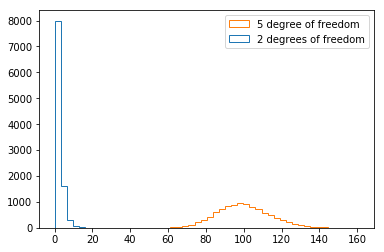

In [29]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2, chi_squared_df5],
                 bins = 50,
                 histtype = 'step',
                 label = ['2 degrees of freedom', '5 degree of freedom'])
plt.legend(loc = 'upper right')

## Hypothesis Testing

In [30]:
df = pd.read_csv('../Data src/grades.csv')

In [31]:
df.head(3)

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000


In [32]:
len(df)

2315

In [35]:
df.shape

(2315, 13)

In [36]:
early_df = df[df['assignment1_submission'] <= '2015-12-31']
late_df = df[df['assignment1_submission'] > '2015-12-31']

In [37]:
early_df.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [38]:
late_df.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [39]:
from scipy import stats
stats.ttest_ind?

In [40]:
stats.ttest_ind(early_df['assignment1_grade'], late_df['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [41]:
stats.ttest_ind(early_df['assignment2_grade'], late_df['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [42]:
stats.ttest_ind(early_df['assignment3_grade'], late_df['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)

## Assignment

This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [30]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 
          'KY': 'Kentucky', 
          'AS': 'American Samoa', 
          'NV': 'Nevada', 
          'WY': 'Wyoming', 
          'NA': 'National', 
          'AL': 'Alabama', 
          'MD': 'Maryland', 
          'AK': 'Alaska', 
          'UT': 'Utah', 
          'OR': 'Oregon', 
          'MT': 'Montana', 
          'IL': 'Illinois', 
          'TN': 'Tennessee', 
          'DC': 'District of Columbia', 
          'VT': 'Vermont', 
          'ID': 'Idaho', 
          'AR': 'Arkansas', 
          'ME': 'Maine', 
          'WA': 'Washington', 
          'HI': 'Hawaii', 
          'WI': 'Wisconsin', 
          'MI': 'Michigan', 
          'IN': 'Indiana', 
          'NJ': 'New Jersey', 
          'AZ': 'Arizona', 
          'GU': 'Guam', 
          'MS': 'Mississippi', 
          'PR': 'Puerto Rico', 
          'NC': 'North Carolina', 
          'TX': 'Texas', 
          'SD': 'South Dakota', 
          'MP': 'Northern Mariana Islands', 
          'IA': 'Iowa', 
          'MO': 'Missouri', 
          'CT': 'Connecticut', 
          'WV': 'West Virginia', 
          'SC': 'South Carolina', 
          'LA': 'Louisiana', 
          'KS': 'Kansas', 
          'NY': 'New York', 
          'NE': 'Nebraska', 
          'OK': 'Oklahoma', 
          'FL': 'Florida', 
          'CA': 'California', 
          'CO': 'Colorado', 
          'PA': 'Pennsylvania', 
          'DE': 'Delaware', 
          'NM': 'New Mexico', 
          'RI': 'Rhode Island', 
          'MN': 'Minnesota', 
          'VI': 'Virgin Islands', 
          'NH': 'New Hampshire', 
          'MA': 'Massachusetts', 
          'GA': 'Georgia', 
          'ND': 'North Dakota', 
          'VA': 'Virginia'}

### Returns a DataFrame of towns and the states they are in from the university_towns.txt list. The format of the DataFrame should be:

``` DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], columns=["State", "RegionName"]  ) ```
    
### The following cleaning needs to be done:

 1. For "State", removing characters from "[" to the end.
 2. For "RegionName", when applicable, removing every character from " (" to the end.
 3. Depending on how you read the data, you may need to remove newline character '\n'.         

In [31]:
def get_list_of_university_towns():
    
    with open('../Data src/university_towns.txt') as file:
        data = []
        for line in file:
            data.append(line[:-1])
            
    state_town = []
    for line in data:
        if line[-6:] == '[edit]':
            state = line[:6]
        elif '(' in line:
            town = line[:(line.index('(') - 1)]
            state_town.append([state, town])
        else: 
            town = line.rstrip()
            state_town.append([state, town])
    answer1 = pd.DataFrame(state_town, columns = ['State', 'RegionName'])
    
    return answer1

In [32]:
get_list_of_university_towns()

,State,RegionName
0,Alabam,Auburn
1,Alabam,Florence
2,Alabam,Jacksonville
3,Alabam,Livingston
4,Alabam,Montevallo
5,Alabam,Troy
6,Alabam,Tuscaloosa
7,Alabam,Tuskegee
8,Alaska,Fairbanks
9,Arizon,Flagstaff


Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3

In [33]:
def get_recession_start():
    
    df = pd.read_excel('../Data src/gdplev.xls', skiprows = 7)
    df = df[['Unnamed: 4', 'Unnamed: 5']]
    df.columns = ['Quarter', 'GDP']
    df = df.iloc[212:]
    df = df.reset_index()
    df = df[['Quarter', 'GDP']]
    
    recession_start = []
    for i in range(len(df) - 4):
        if ((df.iloc[i][1] > df.iloc[i+1][1]) & (df.iloc[i+1][1] > df.iloc[i+2][1])):
            recession_start.append(df.iloc[i][0])
    
    answer2 = recession_start[0]
    
    return answer2

In [34]:
get_recession_start()

'2008q3'

In [35]:
def get_recession_end():
    
    df = pd.read_excel('../Data src/gdplev.xls', skiprows = 7)
    df = df[['Unnamed: 4', 'Unnamed: 6']]
    df.columns = ['Quarter', 'GDP']
    df = df.iloc[212:]
    df = df.reset_index()
    df = df[['Quarter', 'GDP']]
    
    recession_end = []
    for i in range(len(df) - 4):
        if ((df.iloc[i][1] > df.iloc[i+1][1]) & (df.iloc[i+1][1] > df.iloc[i+2][1]) & (df.iloc[i+2][1] < df.iloc[i+3][1]) & (df.iloc[i+3][1] < df.iloc[i+4][1])):
            recession_end.append([df.iloc[i][0],df.iloc[i+1][0],df.iloc[i+2][0],df.iloc[i+3][0],df.iloc[i+4][0]])
    
    answer3 = recession_end[0][4]
    
    return answer3

In [36]:
get_recession_end()

'2009q4'

In [37]:
def get_recession_bottom():
    
    df = pd.read_excel('../Data src/gdplev.xls', skiprows = 7)
    df = df[['Unnamed: 4','Unnamed: 5']]
    df.columns = ['Quarter','GDP']
    df = df.iloc[212:]
    df = df.reset_index()
    df = df[['Quarter','GDP']]
    
    recession_end = []
    for i in range(len(df) - 4):
        if ((df.iloc[i][1] > df.iloc[i+1][1]) & (df.iloc[i+1][1] > df.iloc[i+2][1]) & (df.iloc[i+2][1] < df.iloc[i+3][1]) & (df.iloc[i+3][1] < df.iloc[i+4][1])):
            recession_end.append([df.iloc[i][0],df.iloc[i+1][0],df.iloc[i+2][0],df.iloc[i+3][0],df.iloc[i+4][0]])
            
    answer4 = recession_end[0][2]
    
    return answer4

In [38]:
get_recession_bottom()

'2009q2'

Converts the housing data to quarters and returns it as mean values in a dataframe. This dataframe should be a dataframe with columns for 2000q1 through 2016q3, and should have a multi-index in the shape of ["State","RegionName"].
    
Note: Quarters are defined in the assignment description, they are not arbitrary three month periods.
    
The resulting dataframe should have 67 columns, and 10,730 rows.
    

In [43]:
def convert_to_quarters():
    
    df = pd.read_csv('../Data src/City_Zhvi_AllHomes.csv')
    df = df.drop(df.columns[[0] + list(range(3, 51))], axis = 1)
    df2 = pd.DataFrame(df[['State', 'RegionName']])
    
    for year in range(2000, 2016):
        df2[str(year) + 'q1'] = df[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)
        df2[str(year) + 'q2'] = df[[str(year) + '-04', str(year) + '-05', str(year) + '-06']].mean(axis = 1)
        df2[str(year) + 'q3'] = df[[str(year) + '-07', str(year) + '-08', str(year) + '-09']].mean(axis = 1)
        df2[str(year) + 'q4'] = df[[str(year) + '-10', str(year) + '-11', str(year) + '-12']].mean(axis = 1)
    year = 2016
    df2[str(year) + 'q1'] = df[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)
    df2[str(year) + 'q2'] = df[[str(year) + '-04', str(year) + '-05', str(year) + '-06']].mean(axis = 1)
    df2[str(year) + 'q3'] = df[[str(year) + '-07', str(year) + '-08']].mean(axis = 1)
     
    df2['State'] = [states[state] for state in df2['State']]
    df2 = df2.set_index(['State', 'RegionName'])
    answer5 = pd.DataFrame(df2)
    
    return answer5

In [44]:
convert_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


First creates new data showing the decline or growth of housing prices between the recession start and the recession bottom. Then runs a ttest comparing the university town values to the non-university towns values,  return whether the alternative hypothesis (that the two groups are the same) is true or not as well as the p-value of the confidence. 

Return the tuple (different, p, better) where different=True if the t-test is True at a p less than 0.01 (we reject the null hypothesis), or different=False if otherwise (we cannot reject the null hypothesis). The variable p should be equal to the exact p value returned from scipy.stats.ttest_ind(). The value for better should be either "university town" or "non-university town" depending on which has a lower mean price ratio (which is equivilent to a reduced market loss).

In [51]:
def run_ttest():
    
    unitowns = get_list_of_university_towns()
    bottom = get_recession_bottom()
    start = get_recession_start()
    hdata = convert_to_quarters()
    bstart = hdata.columns[hdata.columns.get_loc(start) - 1]
    
    hdata['ratio'] = hdata[bstart] - hdata[bottom]
    hdata = hdata[[bottom, bstart, 'ratio']]
    hdata = hdata.reset_index()
    
    unitowns_hdata = pd.merge(hdata, unitowns, how = 'inner', 
                             on = ['State', 'RegionName'])
    unitowns_hdata['uni'] = True
    hdata2 = pd.merge(hdata, unitowns_hdata, how = 'outer', 
                     on = ['State', 'RegionName', bottom, bstart, 'ratio'])
    hdata2['uni'] = hdata2['uni'].fillna(False)
    
    ut = hdata2[hdata2['uni'] == True]
    nut = hdata2[hdata2['uni'] == False]
    
    t, p = ttest_ind(ut['ratio'].dropna(), nut['ratio'].dropna())
    
    different = True if p < 0.01 else False
    better = "university town" if ut['ratio'].mean() < nut['ratio'].mean() else "non-university town"
    
    return(different, p, better)

In [52]:
run_ttest()

(False, 0.6076899906629988, 'non-university town')